# Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

In [ ]:
# подключим необходимые библиотеки

import numpy as np
import matplotlib.pyplot as plt
import copy

from sklearn import datasets

%matplotlib inline

### 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [ ]:
"""
 Вспомогательные функции

"""

# Расчет функции ошибки
def ms_err(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err


# Стандартизация
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res


# Отображение рассчитанных данных
def print_data(err, alg_name):
  print(f"======================  {alg_name}  ======================")
  for i in range(len(err)):
    print(i, err[i])


# Обычный градиентный спуск
def calc_gr(X, y, w, alpha, n):
  
  iter_list = []
  err_list = []
  w_list = []
  w_f = copy.deepcopy(w)

  for i in range(n):
    y_pred = np.dot(w_f, X)
    err = ms_err(y, y_pred)
    w_f -= 2 * alpha * np.dot(X, (y_pred - y)) / y.shape[0]

    if i % 100 == 0:
      iter_list.append(i)
      err_list.append(err)

  return iter_list, err_list, w_f


# Стохастический градиентный спуск
def calc_gr_sdg(X, y, qty_in_batch=1, alpha=1e-4, iterations=10000):
  
  iter_list = []
  err_list = []

  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  n_batch = n // qty_in_batch
  
  if n % qty_in_batch != 0:
      n_batch += 1
  
  for i in range(1, iterations+1):
      for b in range(n_batch):
          start_ = qty_in_batch*b
          end_ = qty_in_batch*(b+1)
          
          X_tmp = X[:, start_ : end_]
          y_tmp = y[start_ : end_]
          
          y_pred_tmp = np.dot(W, X_tmp)
          err = ms_err(y_tmp, y_pred_tmp)
          W -= 2 * alpha * np.dot(X_tmp, (y_pred_tmp - y_tmp)) / n
          
      if i % (iterations / 100) == 0:
        iter_list.append(i)
        err_list.append(err)
  return iter_list, err_list, W

In [ ]:
 # Сгенерируем датасет
 X, y = datasets.make_regression(n_samples=10,
                                    n_features = 2,
                                    n_informative = 2,
                                    n_targets = 1,
                                    noise = 5,
                                    random_state = 2)
 
 
X = np.hstack([np.ones((10, 1)), X])
X = X.T

w = np.array([1, 0.5, 0.5])

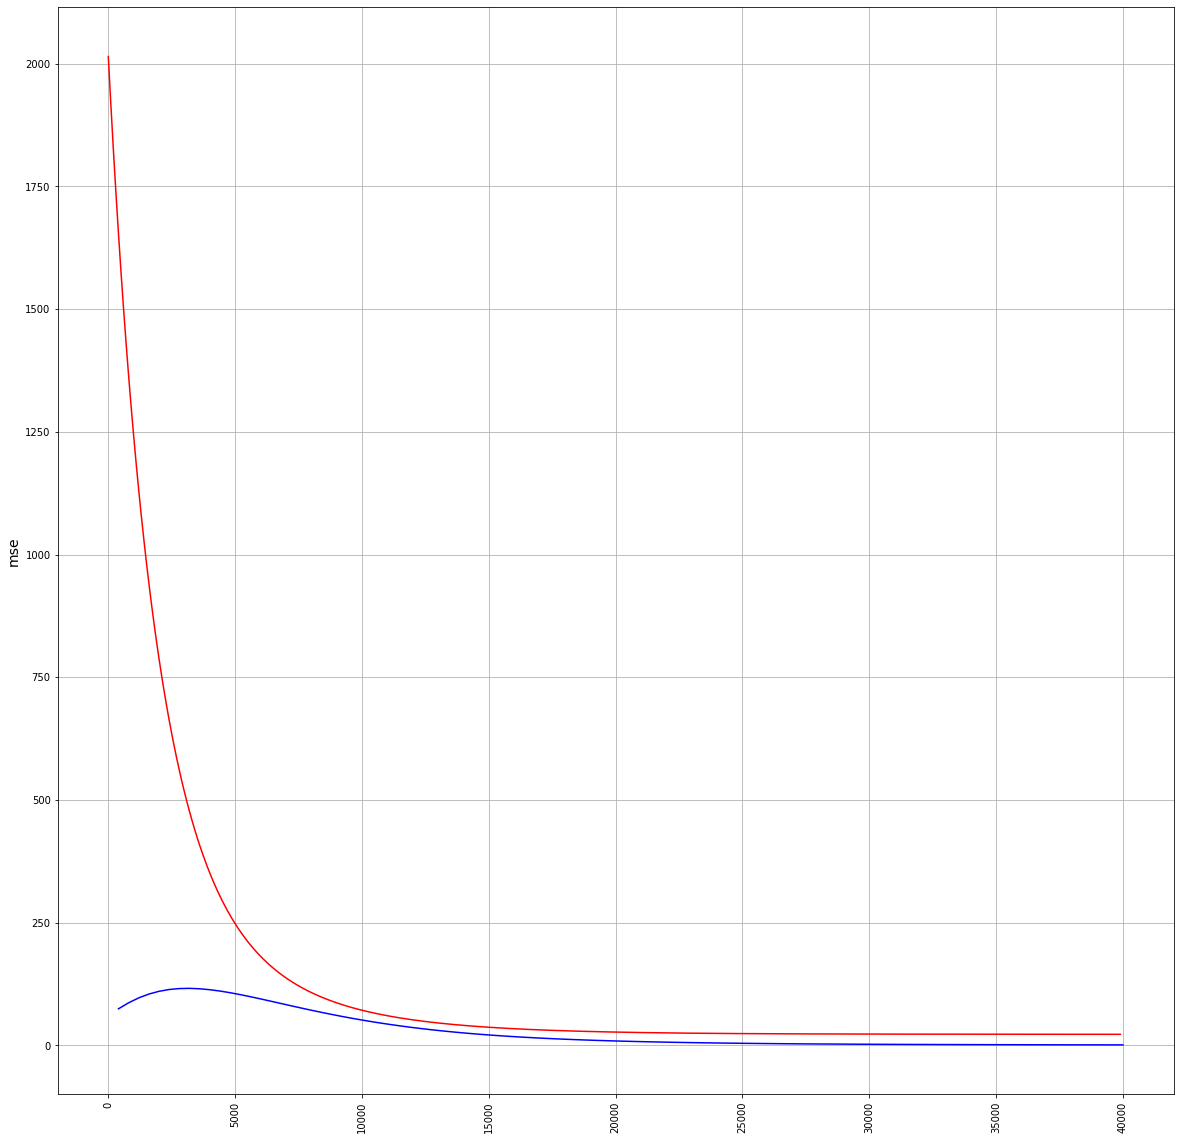

In [ ]:
i1, err1, w1 = calc_gr(X, y, w, 1e-4, 40000)
i2, err2, w2 = calc_gr_sdg(X, y, qty_in_batch=1, alpha=1e-4, iterations=40000)

plt.figure(figsize=(20, 20))

plt.plot(i1, err1, "r")
plt.plot(i2, err2, "b")
plt.ylabel("mse", fontsize=14)
plt.grid(True)
plt.xticks(rotation='vertical')

plt.show()


Судя по графикам, обычный градиентный спуск при прочих равных условиях сходится быстрее. Но если посмотреть на данные, то на самом деле стохастическая регрессия выходит на стабильную ошибку быстрее. 

### 2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

### Включая 3. [опция] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

$|X|^\prime = \frac{X}{|X|}$ или фактически отношение норм векторов W

In [ ]:
# L2
def calc_gr_2(X, y, w, alpha, n, lambda_):
  
  iter_list = []
  err_list = []
  w_list = []
  w_f = copy.deepcopy(w)

  for i in range(n):
    y_pred = np.dot(w_f, X)
    err = ms_err(y, y_pred)
    w_f -= alpha * (2 / y.shape[0] * np.dot(X, (y_pred - y)) + lambda_ * w_f)

    if i % 100 == 0:
      iter_list.append(i)
      err_list.append(err)

  return iter_list, err_list, w_f


# L1
def calc_gr_3(X, y, w, alpha, n, lambda_):
  
  iter_list = []
  err_list = []
  w_list = []
  w_f = copy.deepcopy(w)

  for i in range(n):
    y_pred = np.dot(w_f, X)
    err = ms_err(y, y_pred)
    w_f -= alpha * (2 / y.shape[0] * np.dot(X, (y_pred - y)) + lambda_ * (np.sum(np.abs(w_f)**2)**(1./2)/np.sum(np.abs(w_f))) / 2 )

    if i % 100 == 0:
      iter_list.append(i)
      err_list.append(err)

  return iter_list, err_list, w_f


# Обычный градиентный спуск
def calc_gr_4(X, y, w, alpha, n, lambda_):
  
  iter_list = []
  err_list = []
  w_list = []
  w_f = copy.deepcopy(w)

  for i in range(n):
    y_pred = np.dot(w_f, X)
    err = ms_err(y, y_pred)
    w_f -= 2 * alpha * np.dot(X, (y_pred - y)) / y.shape[0] 

    if i % 100 == 0:
      iter_list.append(i)
      err_list.append(err)

  return iter_list, err_list, w_f

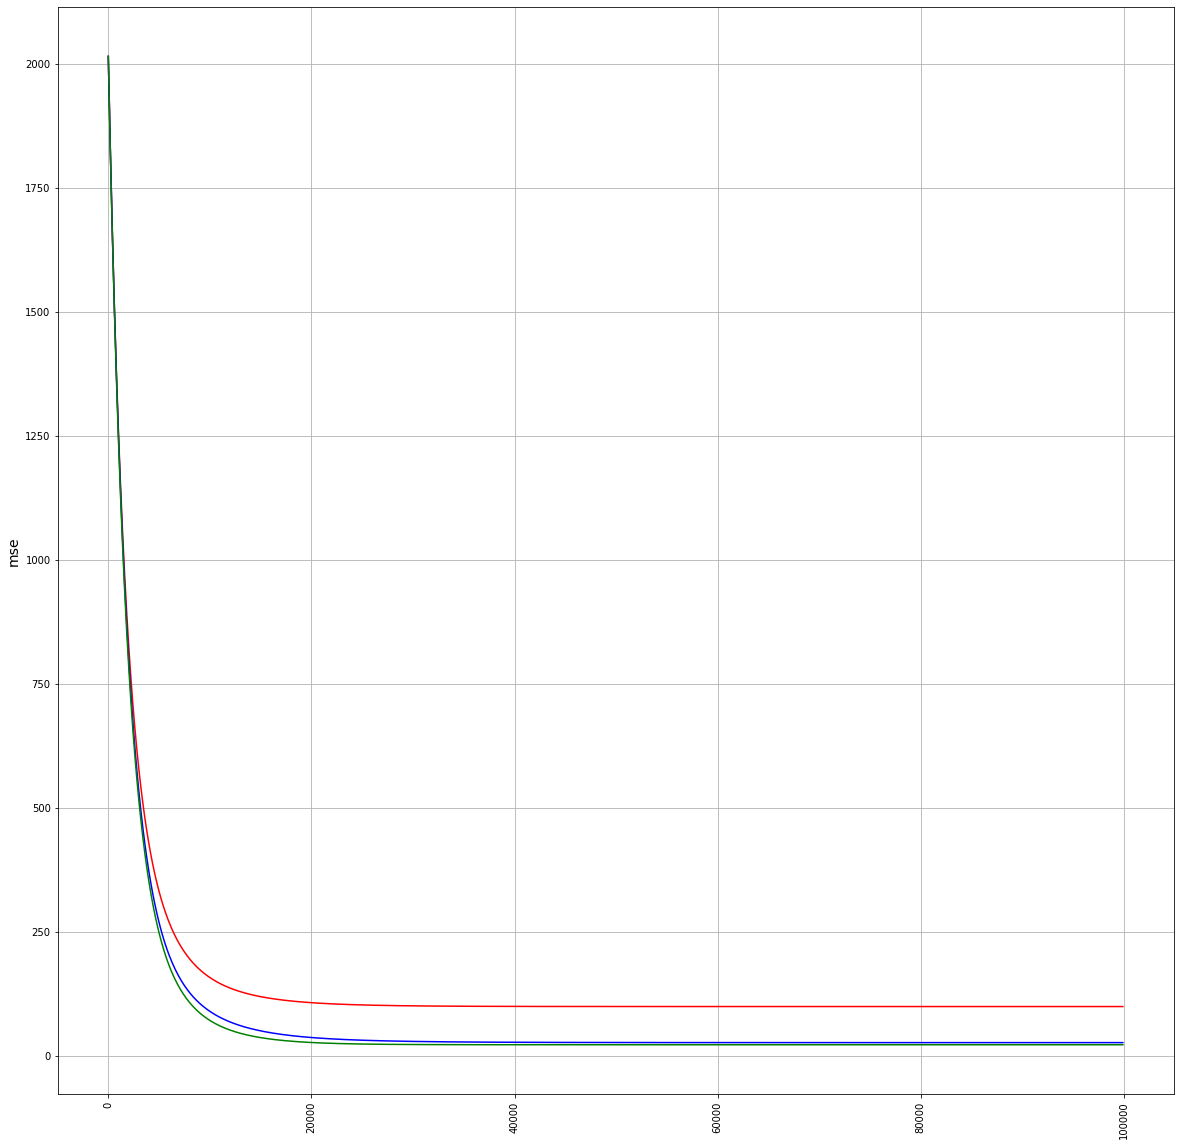

In [ ]:
i3, err3, w3 = calc_gr_2(X, y, w, 1e-4, 100000, 0.5)
i4, err4, w4 = calc_gr_3(X, y, w, 1e-4, 100000, 5)
i5, err5, w5 = calc_gr_4(X, y, w, 1e-4, 100000, 0.5)

plt.figure(figsize=(20, 20))

plt.plot(i3, err3, "r")
plt.plot(i4, err4, "b")
plt.plot(i5, err5, "g")
plt.ylabel("mse", fontsize=14)
plt.grid(True)
plt.xticks(rotation='vertical')

plt.show()

Добавляя $L_1$ или $L_2$ регуляризацию мы фактически не даем переобучаться, тем самым ошибка не стремится к 0 и на графике находится немного выше, чем при регуляризации

